I am Choosing 1st one from Time Series Data 
● Bureau of Labor Statistics: Write a generalist harvester that could be scaled across BLS data products

# Importing some useful libraries


In [1]:
import pandas as pd
import numpy as np
import urllib
from urllib.request import urlretrieve

# urls for time series and area code data

In [2]:
url1 = "https://download.bls.gov/pub/time.series/la/la.data.60.Metro"
url2 = "https://download.bls.gov/pub/time.series/la/la.area"

# Saving the data as .csv file

In [3]:
urlretrieve(url1, 'C:\\Users\Admin\Desktop\WebScrapper (Python-Data-Engineer)/timeseries.csv')
urlretrieve(url2, 'C:\\Users\Admin\Desktop\WebScrapper (Python-Data-Engineer)/area_codes.csv')

('C:\\Users\\Admin\\Desktop\\WebScrapper (Python-Data-Engineer)/area_codes.csv',
 <http.client.HTTPMessage at 0x1657e432380>)

# Reading in time series data

In [4]:
#Creating a variable with df1 i.e data frame one
df1 = pd.read_csv('C:\\Users\Admin\Desktop\WebScrapper (Python-Data-Engineer)/timeseries.csv', delimiter="\t")

C:\Users\Admin\AppData\Local\Temp\ipykernel_8060\708387673.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('C:\\Users\Admin\Desktop\WebScrapper (Python-Data-Engineer)/timeseries.csv', delimiter="\t")


In [5]:
# Checking the first five rows of data frame

df1.head()

,series_id,year,period,value,footnote_codes
0,LASMT261982000000003,1990,M01,7.6,NaN
1,LASMT261982000000003,1990,M02,7.6,NaN
2,LASMT261982000000003,1990,M03,7.5,NaN
3,LASMT261982000000003,1990,M04,7.6,NaN
4,LASMT261982000000003,1990,M05,7.6,NaN


In [6]:
# Checking the last five rows of data frame

df1.tail()

,series_id,year,period,value,footnote_codes
676339,LAUMT724198000000006,2022,M05,807903,NaN
676340,LAUMT724198000000006,2022,M06,796940,NaN
676341,LAUMT724198000000006,2022,M07,782662,NaN
676342,LAUMT724198000000006,2022,M08,788493,P
676343,LAUMT724198000000006,2022,M09,-,N


In [7]:
# For some general info about the data like data type, nos. of columns...  
 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676344 entries, 0 to 676343
Data columns (total 5 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   series_id                       676344 non-null  object
 1   year                            676344 non-null  int64 
 2   period                          676344 non-null  object
 3          value                    676344 non-null  object
 4   footnote_codes                  1788 non-null    object
dtypes: int64(1), object(4)
memory usage: 25.8+ MB


In [8]:
# Looking at the info, I could see leading whitespace around the column called value so I checked the column names
# Doing this shows leading and trailing whitespaces around column names
df1.columns

Index(['series_id                     ', 'year', 'period', '       value',
       'footnote_codes'],
      dtype='object')

# I am aiming for the unemployment rate

In [9]:
# Renaming the columns to clear the whitespace
# value is the indicator name in this case.
df1.rename(columns={'series_id                     ':'series_id', '       value':'unemployment'}, inplace=True)

In [10]:
# Droping the specific column "footnote_codes".
df1.drop('footnote_codes', axis = 1, inplace=True)

In [11]:
# Creating a variable measure from series_id. 
# I read from the metadata file that the last two characters of series_id 
# represent the name of an indicator. In this case 03 = unemployment rate. 
# See https://download.bls.gov/pub/time.series/la/la.measure.
df1['measure'] = df1['series_id'].apply(lambda x: x[18:].strip())

In [12]:
# Since cleaning is an iterative process, I am checking the data again.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676344 entries, 0 to 676343
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   series_id     676344 non-null  object
 1   year          676344 non-null  int64 
 2   period        676344 non-null  object
 3   unemployment  676344 non-null  object
 4   measure       676344 non-null  object
dtypes: int64(1), object(4)
memory usage: 25.8+ MB


In [13]:
df1.head()

,series_id,year,period,unemployment,measure
0,LASMT261982000000003,1990,M01,7.6,03
1,LASMT261982000000003,1990,M02,7.6,03
2,LASMT261982000000003,1990,M03,7.5,03
3,LASMT261982000000003,1990,M04,7.6,03
4,LASMT261982000000003,1990,M05,7.6,03


In [14]:
# What other data values are in the measure variable?
df1['measure'].value_counts()

03    169086
04    169086
05    169086
06    169086
Name: measure, dtype: int64

In [15]:
# Filtering unemployment data
df1 = df1[df1['measure'] == '03']
df1.reset_index(drop = True, inplace=True)

In [16]:
df1.tail()

,series_id,year,period,unemployment,measure
169081,LAUMT724198000000003,2022,M05,5.0,03
169082,LAUMT724198000000003,2022,M06,5.0,03
169083,LAUMT724198000000003,2022,M07,4.9,03
169084,LAUMT724198000000003,2022,M08,5.2,03
169085,LAUMT724198000000003,2022,M09,-,03


In [17]:
#Need to convert unemployment values to float. 
#Apparently some values were "bad" and cannot be changed by Directly applying float()
#Build a dictionary of string unemployment values.

cnt = 0
unemployment_dict = {}
for row in df1['unemployment']:
    if row is not None:
        try:
            float(row)
            pass
        except ValueError:
            unemployment_dict[cnt] = row
    cnt+=1

print(unemployment_dict)
print(len(unemployment_dict))

{166503: '           -', 166504: '           -', 166513: '           -', 166535: '           -', 166928: '           -', 166929: '           -', 166938: '           -', 166960: '           -', 167353: '           -', 167354: '           -', 167363: '           -', 167385: '           -', 167778: '           -', 167779: '           -', 167788: '           -', 167810: '           -', 168203: '           -', 168204: '           -', 168213: '           -', 168235: '           -', 168628: '           -', 168629: '           -', 168638: '           -', 168660: '           -', 169053: '           -', 169054: '           -', 169063: '           -', 169085: '           -'}
28


In [18]:
# check 
df1.loc[161427]

series_id       LAUMT552254000000003          
year                                      2022
period                                     M01
unemployment                               2.7
measure                                     03
Name: 161427, dtype: object

In [19]:
# Removing bad characters by first naming them 'unavailable'. 
# Whitespace stripping did not work, but changing the values to helps to identify the bad data

for i in unemployment_dict:
    unemployment_dict[i] = "unavailable"
      
print(unemployment_dict)

{166503: 'unavailable', 166504: 'unavailable', 166513: 'unavailable', 166535: 'unavailable', 166928: 'unavailable', 166929: 'unavailable', 166938: 'unavailable', 166960: 'unavailable', 167353: 'unavailable', 167354: 'unavailable', 167363: 'unavailable', 167385: 'unavailable', 167778: 'unavailable', 167779: 'unavailable', 167788: 'unavailable', 167810: 'unavailable', 168203: 'unavailable', 168204: 'unavailable', 168213: 'unavailable', 168235: 'unavailable', 168628: 'unavailable', 168629: 'unavailable', 168638: 'unavailable', 168660: 'unavailable', 169053: 'unavailable', 169054: 'unavailable', 169063: 'unavailable', 169085: 'unavailable'}


In [20]:
# Now Replacing values in main dataframe
for i in unemployment_dict:
    df1.loc[i, 'unemployment'] = unemployment_dict[i]

In [21]:
# Creating the new data frame/set for the cleaned data
df2 = df1[df1['unemployment'] != 'unavailable']

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169058 entries, 0 to 169084
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   series_id     169058 non-null  object
 1   year          169058 non-null  int64 
 2   period        169058 non-null  object
 3   unemployment  169058 non-null  object
 4   measure       169058 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.7+ MB


In [23]:
# Having removed the 'bad' values, the 'good' ones can now be converted to float data
df2['unemployment'] = df2['unemployment'].apply(float)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8060\3007801363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['unemployment'] = df2['unemployment'].apply(float)


In [24]:
# To keep the data small I filter 2020 to date

df3 = df2.loc[df2['year'] >= 2020]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13898 entries, 360 to 169084
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   series_id     13898 non-null  object 
 1   year          13898 non-null  int64  
 2   period        13898 non-null  object 
 3   unemployment  13898 non-null  float64
 4   measure       13898 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 651.5+ KB


In [25]:
# Since I need to know the names of the MSAs, I create a new column 'area_code' using appropriate indexes
# from series_id
# This new column will be used to create a join with the data file containing names of MSAs
df2["area_code"] = df2['series_id'].apply(lambda x: x[3:18])

C:\Users\Admin\AppData\Local\Temp\ipykernel_8060\447014200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["area_code"] = df2['series_id'].apply(lambda x: x[3:18])


In [26]:
df2.head()

,series_id,year,period,unemployment,measure,area_code
0,LASMT261982000000003,1990,M01,7.6,03,MT2619820000000
1,LASMT261982000000003,1990,M02,7.6,03,MT2619820000000
2,LASMT261982000000003,1990,M03,7.5,03,MT2619820000000
3,LASMT261982000000003,1990,M04,7.6,03,MT2619820000000
4,LASMT261982000000003,1990,M05,7.6,03,MT2619820000000


df2 (unemployment values dataset) will be merged with df3 (area code names) to get a panel dataset of unemployment rate in metropolitan statistical areas

In [27]:
# Read in the area codes data. The data is tab delimited
# This data will be mapped to the unemployment time series
df3 = pd.read_csv('area_codes.csv', delimiter="\t")
df3.head(5)

,area_type_code,area_code,area_text,display_level,selectable,sort_sequence
0,A,ST0100000000000,Alabama,0,T,1
1,A,ST0200000000000,Alaska,0,T,149
2,A,ST0400000000000,Arizona,0,T,193
3,A,ST0500000000000,Arkansas,0,T,257
4,A,ST0600000000000,California,0,T,383


In [28]:
# Check for issues with column names
df3.columns

Index(['area_type_code', 'area_code', 'area_text', 'display_level',
       'selectable', 'sort_sequence'],
      dtype='object')

In [29]:
# Will use area code B for metropolitan statistical areas
# See https://download.bls.gov/pub/time.series/la/la.area_type
df3['area_type_code'].value_counts()

F    3224
G    1919
H    1430
D     562
B     396
I     321
E     178
K     160
J      71
A      52
C      38
N       9
L       7
M       4
Name: area_type_code, dtype: int64

In [30]:
# Filter metropolitan areas
df4 = df3[df3['area_type_code'] == 'B']

In [31]:
df4['area_type_code'].value_counts()

B    396
Name: area_type_code, dtype: int64

In [32]:
# Merging unemployment statistics with MSA names
df5 = df2.merge(df4, on='area_code')

In [33]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169058 entries, 0 to 169057
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   series_id       169058 non-null  object 
 1   year            169058 non-null  int64  
 2   period          169058 non-null  object 
 3   unemployment    169058 non-null  float64
 4   measure         169058 non-null  object 
 5   area_code       169058 non-null  object 
 6   area_type_code  169058 non-null  object 
 7   area_text       169058 non-null  object 
 8   display_level   169058 non-null  int64  
 9   selectable      169058 non-null  object 
 10  sort_sequence   169058 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 15.5+ MB


In [34]:
df5.head()

,series_id,year,period,unemployment,measure,area_code,area_type_code,area_text,display_level,selectable,sort_sequence
0,LASMT261982000000003,1990,M01,7.6,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati...",0,T,3747
1,LASMT261982000000003,1990,M02,7.6,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati...",0,T,3747
2,LASMT261982000000003,1990,M03,7.5,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati...",0,T,3747
3,LASMT261982000000003,1990,M04,7.6,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati...",0,T,3747
4,LASMT261982000000003,1990,M05,7.6,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati...",0,T,3747


In [35]:
# Checking the periodicity of the data using the 'period' column
# There are 13 values where M13 is the annual data.
df5.period.value_counts()

M01    13134
M02    13134
M05    13134
M06    13134
M07    13134
M08    13134
M03    13127
M04    13127
M09    13127
M10    12736
M11    12736
M12    12736
M13    12665
Name: period, dtype: int64

In [36]:
# Rows where the period value is M13 can be selected for analysis with annual data
annual_unemployment = df5[df5['period'] == 'M13']
annual_unemployment.head()

,series_id,year,period,unemployment,measure,area_code,area_type_code,area_text,display_level,selectable,sort_sequence
405,LAUMT261982000000003,1990,M13,7.9,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati...",0,T,3747
418,LAUMT261982000000003,1991,M13,9.8,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati...",0,T,3747
431,LAUMT261982000000003,1992,M13,9.5,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati...",0,T,3747
444,LAUMT261982000000003,1993,M13,7.3,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati...",0,T,3747
457,LAUMT261982000000003,1994,M13,5.7,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati...",0,T,3747


In [37]:
# But I am interested in the monthly data so I filtered M13 rows
monthly_unemployment = df5[df5['period'] != 'M13']
monthly_unemployment.head()

,series_id,year,period,unemployment,measure,area_code,area_type_code,area_text,display_level,selectable,sort_sequence
0,LASMT261982000000003,1990,M01,7.6,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati...",0,T,3747
1,LASMT261982000000003,1990,M02,7.6,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati...",0,T,3747
2,LASMT261982000000003,1990,M03,7.5,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati...",0,T,3747
3,LASMT261982000000003,1990,M04,7.6,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati...",0,T,3747
4,LASMT261982000000003,1990,M05,7.6,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati...",0,T,3747


In [38]:
# I save the monthly data to csv
monthly_unemployment.to_csv("C:\\Users\Admin\Desktop\WebScrapper (Python-Data-Engineer)/monthly_unemployment.csv", index=False)

This can be read in during subsequent analysis
monthly_unemployment = pd.read_csv("filepath/monthly_unemployment.csv")

In [39]:
# Some further data cleaning by dropping out unneeded columns of data
monthly_unemploymentdf = monthly_unemployment.drop(['series_id', 'display_level', 'selectable', 'sort_sequence'], axis = 1)

Finally I have a clean dataframe of monthly unemployment data for 396 U.S. metropolitan statistical areas Of course some further cleaning can be done for instance removing 'Metropolitan Statistical Area' from 'area_txt' column to produce the city-state names of the MSA only. 
A column of city or states only can be produced too.

In [40]:
monthly_unemploymentdf.head()

,year,period,unemployment,measure,area_code,area_type_code,area_text
0,1990,M01,7.6,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati..."
1,1990,M02,7.6,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati..."
2,1990,M03,7.5,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati..."
3,1990,M04,7.6,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati..."
4,1990,M05,7.6,03,MT2619820000000,B,"Detroit-Warren-Dearborn, MI Metropolitan Stati..."


In [41]:
monthly_unemploymentdf.tail()

,year,period,unemployment,measure,area_code,area_type_code,area_text
169053,2022,M04,5.0,03,MT7241980000000,B,"San Juan-Carolina-Caguas, PR Metropolitan Stat..."
169054,2022,M05,5.0,03,MT7241980000000,B,"San Juan-Carolina-Caguas, PR Metropolitan Stat..."
169055,2022,M06,5.0,03,MT7241980000000,B,"San Juan-Carolina-Caguas, PR Metropolitan Stat..."
169056,2022,M07,4.9,03,MT7241980000000,B,"San Juan-Carolina-Caguas, PR Metropolitan Stat..."
169057,2022,M08,5.2,03,MT7241980000000,B,"San Juan-Carolina-Caguas, PR Metropolitan Stat..."


C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


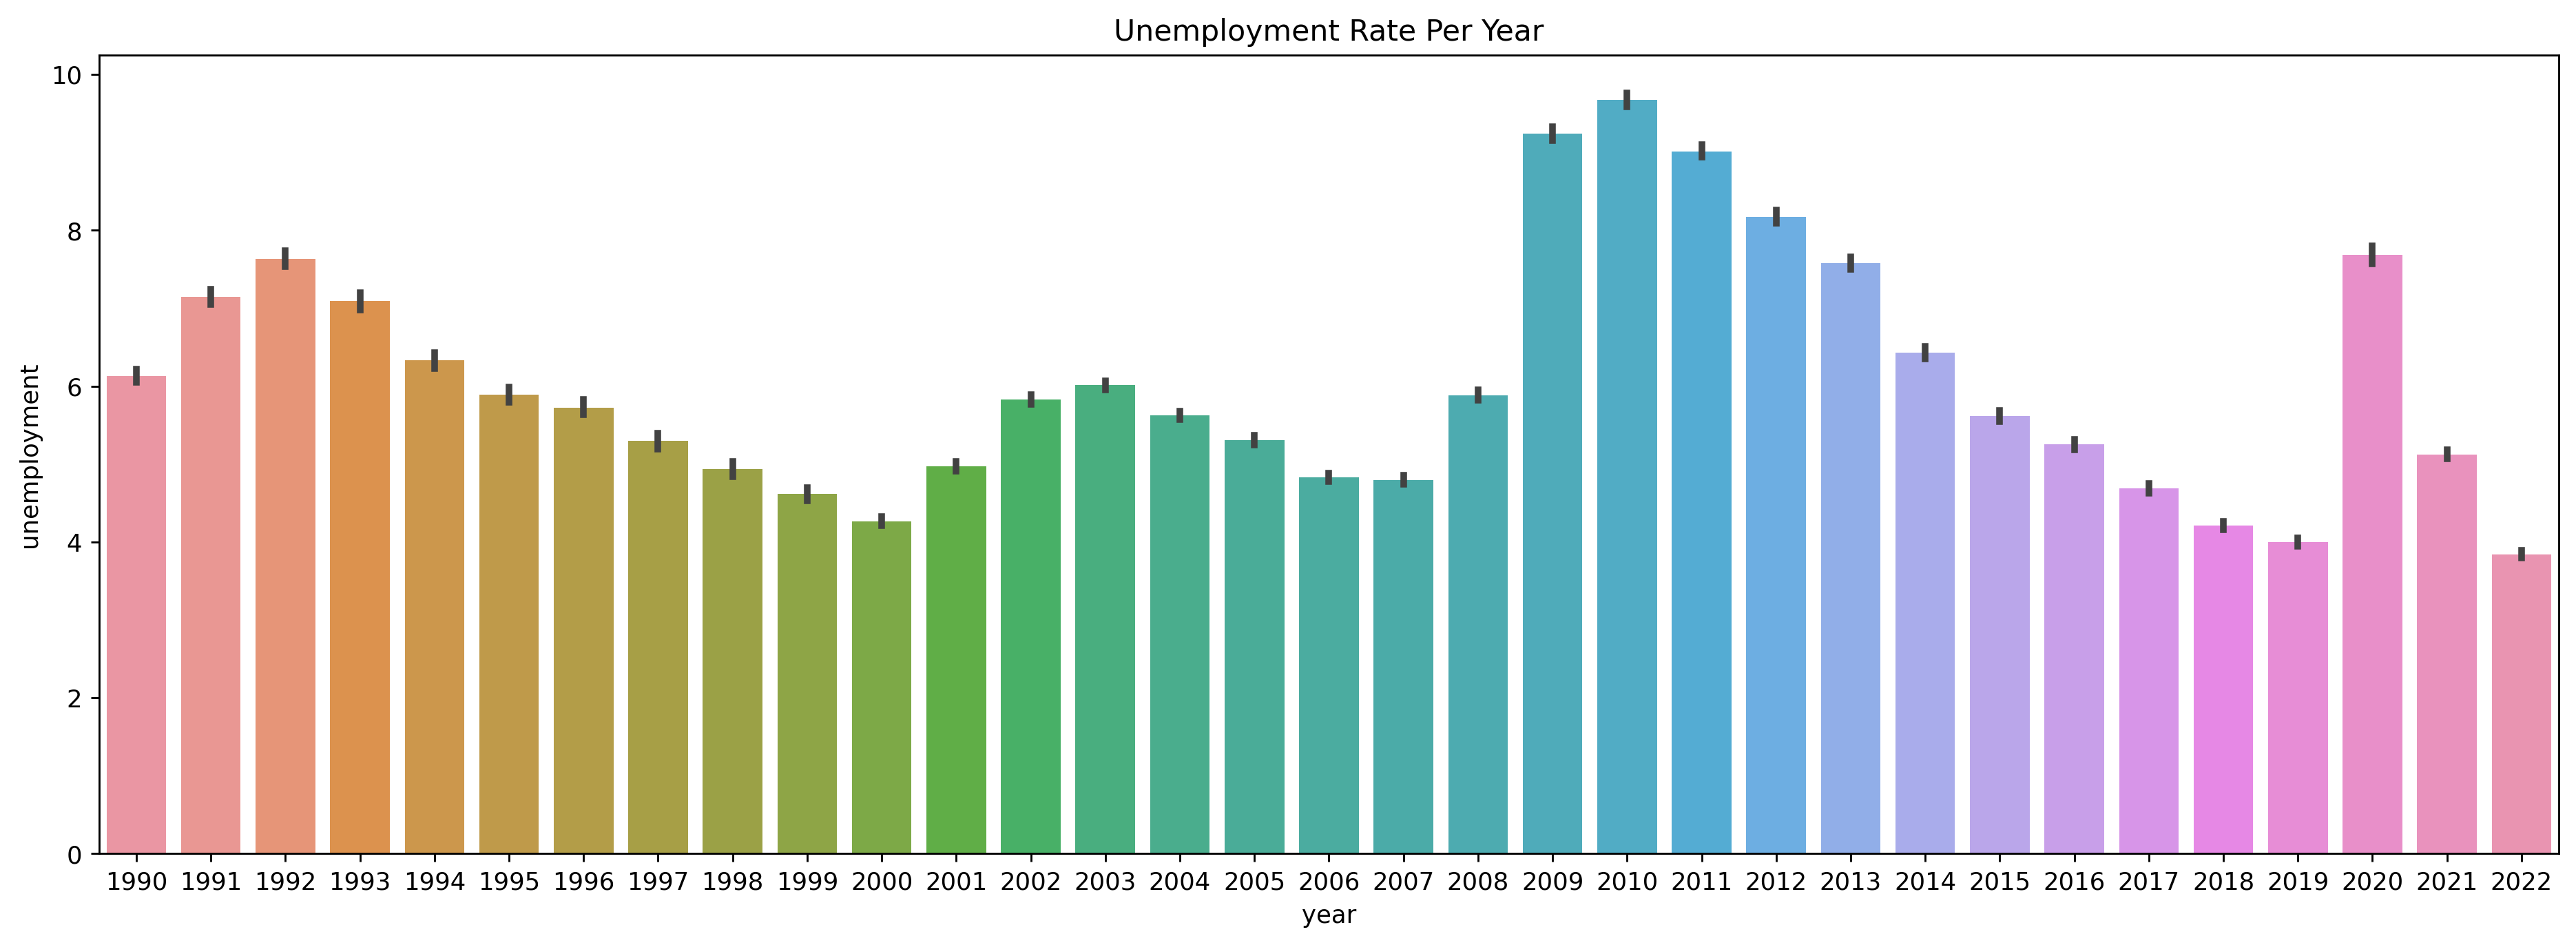

In [45]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
figure(num=None, figsize=(18,6), dpi=256, facecolor='w', edgecolor='r')
plt.title("Unemployment Rate Per Year")
sns.barplot(monthly_unemploymentdf['year'], monthly_unemploymentdf['unemployment'])
plt.show()